# Automating administrative workflows

In [1]:
from arcgis.gis import *

In [22]:
gis = GIS("https://localgovne.maps.arcgis.com", "patrick.hammons.tugis")

Enter password: ········


## Querying for users

In [3]:
gis.users.search()

[<User username:adam.ziegler.workshop>,
 <User username:alex.brown.localgovne>,
 <User username:insightuser01>,
 <User username:insightuser02>,
 <User username:insightuser03>,
 <User username:insightuser04>,
 <User username:insightuser05>,
 <User username:insightuser06>,
 <User username:insightuser07>,
 <User username:insightuser08>,
 <User username:insightuser09>,
 <User username:insightuser10>,
 <User username:insightuser11>,
 <User username:insightuser12>,
 <User username:insightuser13>,
 <User username:insightuser14>,
 <User username:insightuser15>,
 <User username:insightuser16>,
 <User username:insightuser17>,
 <User username:insightuser18>,
 <User username:insightuser19>,
 <User username:insightuser20>,
 <User username:insightuser21>,
 <User username:insightuser22>,
 <User username:insightuser23>,
 <User username:insightuser24>,
 <User username:insightuser25>,
 <User username:insightuser26>,
 <User username:insightuser27>,
 <User username:insightuser28>,
 <User username:insightu

In [4]:
#filter users
gis.users.search("patrick*")

[<User username:patrick.hammons.tugis>]

In [5]:
#filter users
gis.users.search("jdoe")

[]

### Create a new user

In [6]:
jdoe = gis.users.create(username = 'jdoe', password='whateva4eva', 
                 firstname='John', lastname='Doe',
                 email='jdoe@esri.com', role='org_user')

jdoe

<User username:jdoe>

In [7]:
type(jdoe)

arcgis.gis.User

In [8]:
jdoe.update(thumbnail='jdoe.jpg')

True

<User username:jdoe>
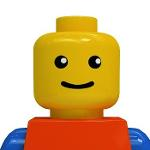

In [9]:
jdoe

## Searching for groups

In [9]:
gis.groups.search()

[<Group title:"Analysis with ArcGIS Online" owner:krithica.kantharaj.tugis>,
 <Group title:"ArcGIS Collector Workshop" owner:mscott_tugis>,
 <Group title:"Crime analysis1" owner:patrick.hammons.tugis>,
 <Group title:"DVRPC Workshop Open Data" owner:patrick.hammons.tugis>,
 <Group title:"Featured Content Gallery" owner:mscott_tugis>,
 <Group title:"Hub Administration Group" owner:patrick.hammons.tugis>,
 <Group title:"MAC URISA 2016 Open Data" owner:patrick.hammons.tugis>,
 <Group title:"Marketplace Purchases" owner:mark.scott.localgovne>,
 <Group title:"NEARC 2017" owner:mscott_tugis>,
 <Group title:"NJTPA Open Data Workshop" owner:patrick.hammons.tugis>,
 <Group title:"NYARC Web App Builder Workshop" owner:krithica.kantharaj.tugis>,
 <Group title:"Open Data site for NEARC" owner:mscott_tugis>,
 <Group title:"PAGIS 2017" owner:mscott_tugis>,
 <Group title:"Parks & Recreation" owner:mscott_tugis>,
 <Group title:"Public Schools" owner:mscott_tugis>,
 <Group title:"Public Works" owner:msc

In [10]:
#create groups
group_summary = 'A group to share data related to crime and analyze them'
group_description = 'Analysis, visualization, modeling of crime and crime related datasets using GIS'

crime_group = gis.groups.create(title='Crime analysis1', tags='crime, machine learning, clustering', 
                      description=group_description,
                      snippet=group_summary,
                     thumbnail='crime_analysis_group.png')

<Group title:"Crime analysis1" owner:patrick.hammons.tugis>
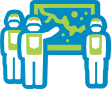

In [11]:
crime_group

## Add user to a group

In [15]:
crime_group.add_users(jdoe)

{'notAdded': ['jdoe']}

## Removing users

<User username:jdoe>
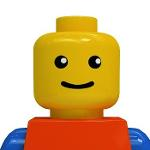

In [18]:
batman = gis.users.search('jdoe')[0]
batman

In [19]:
batman.delete()

True

In [20]:
batman.items()

You do not have permissions to access this resource or perform this operation.


RuntimeError: You do not have permissions to access this resource or perform this operation.
(Error Code: 403)

In [18]:
batman.groups

[]

In [19]:
items = batman.items()
for item in items:
    item.reassign_to('jdoe')

Item does not exist or is inaccessible.


RuntimeError: Item does not exist or is inaccessible.
(Error Code: 400)

## John Doe's contents

In [23]:
jdoe.items()

You do not have permissions to access this resource or perform this operation.


RuntimeError: You do not have permissions to access this resource or perform this operation.
(Error Code: 403)